## Шаг 1. Обзор данных

Составление первого представления о данных статистики архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import warnings

Чтение файла real_estate_data.csv и сохрание его в переменной df:

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Вывод на экран первые десять строк таблицы:

In [3]:
# получение первых 10 строк таблицы df
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Общая информация о таблице:

In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице двадцать два столбца. Тип данных во всех столбцах разный.

Согласно документации к данным:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;
* `ceiling_height` — высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `rooms` — число комнат;
* `studio` — квартира-студия (булев тип);
* `total_area` — площадь квартиры в квадратных метрах (м²);
* `total_images` — число фотографий квартиры в объявлении.

В названиях столбцов `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` прсутствуют нарушения стиля.

В некоторых столбцах, например в `floors_total` значения лучше заменить на целочисленные. А для столбца `is_apartment` в документации указан - булев тип, но при просмотре информации о таблице, можно заметить, что тип - object, в этом необходимо разобраться подробнее, верятнее всего это из-за большого количества отсутствующих значений.

В данных присутствуют пропуски, а также количество значений в столбцах разное.

**Вывод**

Просмотрев таблицу, что необходимо будет сделать далее:
* `last_price`, `floors_total` заменить значения на целочисленные;
* `first_day_exposition` перевести значения в формат Datetime;
* `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`,`ponds_nearest`, `days_exposition`  разобраться в причинах появления пропусков и принять решение по их заполнению;
* `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` исправить нарушения в названиях столбцов.


## Шаг 2. Предобработка данных

### Стиль заголовков

Исправление стиля в заголовках столбцов

In [5]:
# перечень названий столбцов таблицы df
print(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [6]:
# переименование столбцов
df = df.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'})

# проверка результатов - перечень названий столбцов
print(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


### Заполнение пропусков

В тринадцати столбцах из двадцати двух есть пропущенные значения, необходимо найти их:

In [7]:
# подсчёт пропусков
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# функция для подсчета доли пропусков
def pass_value(value, total_value, name):
    miss_part = value / total_value
    return print(f'{name} {miss_part:.0%}')

In [9]:
# подсчет доли пропусков в столбцах
for col in df.columns:
    pass_value(df[col].isna().sum(), len(df), col)

total_images 0%
last_price 0%
total_area 0%
first_day_exposition 0%
rooms 0%
ceiling_height 39%
floors_total 0%
living_area 8%
floor 0%
is_apartment 88%
studio 0%
open_plan 0%
kitchen_area 10%
balcony 49%
locality_name 0%
airports_nearest 23%
city_centers_nearest 23%
parks_around_3000 23%
parks_nearest 66%
ponds_around_3000 23%
ponds_nearest 62%
days_exposition 13%


В таких столбцах как `floors_total` и `locality_name` доля пропусков составляет менее 5%, поэтому от значений в данных столбцах можно избавиться. Причиной появления настоящих пропусков могла стать ошибка при переносе данных или данные просто могли быть не указаны изначально.

In [10]:
# удаление пропущеных значений в floors_total и locality_name
df = df.dropna(subset=['floors_total', 'locality_name'])

# подсчёт пропусков для проверки
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000        5500
parks_nearest           15535
ponds_around_3000        5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Попусков в столбцах `floors_total` и `locality_name` больше нет.

Отсутствующие значения в `ceiling_height`, `living_area`, `kitchen_area`, `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000` и `ponds_nearest` будут заполнены медианным значением с группировкой по `locality_name`:

In [11]:
# для того чтобы предупреждение не мешало
warnings.filterwarnings('ignore')

# список с названиями столбцов
columns_list = ['ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 'city_centers_nearest', 
                'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest']
for column in columns_list:
    for item in df['locality_name'].unique():
        median = df.loc[df['locality_name'] == item, column].median()
        df.loc[(df[column].isna()) & (df['locality_name'] == item), column] = median
        
# подсчёт пропусков для проверки
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            120
floors_total                0
living_area                17
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area               19
balcony                 11475
locality_name               0
airports_nearest         5432
city_centers_nearest     5432
parks_around_3000        5432
parks_nearest            5986
ponds_around_3000        5432
ponds_nearest            5517
days_exposition          3171
dtype: int64

Пропусков стало значительно меньше, но они все же остались, причиной может быть, что для многих населенных пунктов вообще нет данных по определенным столбцам. Замена таких значений на медианное по столбцу:

In [12]:
# функция для замены пропущенных значений
def fill_nans(column):
    result = df[column].fillna(df[column].median(), inplace=True)
    return result

In [13]:
# замена в столбце ceiling_height
fill_nans('ceiling_height')

В столбцах `living_area` и `kitchen_area` заполнены медианным значением с группировкой по `rooms`:

In [14]:
# список с названиями столбцов
columns_list2 = ['living_area', 'kitchen_area']

for column in columns_list2:
    for item in df['rooms'].unique():
        median = df.loc[df['rooms'] == item, column].median()
        df.loc[(df[column].isna()) & (df['rooms'] == item), column] = median
        
# подсчёт пропусков для проверки
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11475
locality_name               0
airports_nearest         5432
city_centers_nearest     5432
parks_around_3000        5432
parks_nearest            5986
ponds_around_3000        5432
ponds_nearest            5517
days_exposition          3171
dtype: int64

Пропуски в `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest` оставляем, так как для них нет возможности корректной замены. Осталось разобраться со столбцами `is_apartment`, `balcony` и `days_exposition`.

In [15]:
# замена в is_apartment для возможности работы с этими данными
df['is_apartment'] = df['is_apartment'].fillna(False)

In [16]:
# замена в balcony, вероятнее всего балкона нет
df['balcony'] = df['balcony'].fillna(0)

В столбце `days_exposition` пропуски лучше оставть, возможно объявление все еще активно, поэтому данные отсутсвуют.

In [17]:
# подсчёт пропусков для проверки
display(df.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5432
city_centers_nearest    5432
parks_around_3000       5432
parks_nearest           5986
ponds_around_3000       5432
ponds_nearest           5517
days_exposition         3171
dtype: int64

### Изменение типа данных

В столбцах `last_price`, `floors_total` и `balcony` заменить значения на целочисленные:

In [18]:
# изменение типа данных на целочисленный
df['last_price'] = df['last_price'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)

Смена типа данных в столбце `first_day_exposition` для удобства:

In [19]:
# изменение типа данных на DateTime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Все типы изменены, в столбце `is_apartment` тип изменился автоматически после заполнения пропусков.

### Проверка на наличие дубликатов

In [21]:
# поиск количества явных дубликатов
print(df.duplicated().sum())

0


**Вывод**

В ходе предобработки данных было обнаружено множество пропущеных значений, которые были заполнены с группировкой по локации, оставшиеся пропуски после замены по локации, например для `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest` были оставлены, так как для них нет корректой замены, и для `days_exposition`, так как объявление вероятнее всего еще находится в активном статусе, для `floors_total` и `locality_name`, пропуски были удалены, так как доля их от общего числа значений менее 5%, для `living_area` и `kitchen_area` была произведена замена с группировкой количеству комнат. 

Заголовки и перевод в другой тип данных значений некоторых стобцов, например в `last_price`, `floors_total` и `balcony` были исправлены на целочисленные, чтобы упростить работу с таблицей.

## Шаг 3. Расчёты и добавление результатов в таблицу

In [22]:
# расчет стоимости квадратного метра
df['price_sq_meter'] = df['last_price'] / df['total_area']

# приведение к целому значению для удобства
df['price_sq_meter'] = df['price_sq_meter'].astype(int)

In [23]:
# расчет года публикации объявления
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [24]:
# расчет месяца публикации объявления
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [25]:
# расчет дня недели публикации объявления
df['week_day'] = pd.DatetimeIndex(df['first_day_exposition']).weekday

In [26]:
# функция для категоризации
def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

# расчет этажа квартиры; варианты — первый, последний, другой
df['floor_cat'] = df.apply(floor_cat, axis = 1) 

In [27]:
# расчет соотношение жилой и общей площади
df['share_living_area'] = df['living_area'] / df['total_area']

In [28]:
# расчет отношения площади кухни к общей
df['share_kitchen_area'] = df['kitchen_area'] / df['total_area']

In [29]:
# проверка
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,year,month,week_day,floor_cat,share_living_area,share_kitchen_area
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.0,8,False,...,2.0,755.0,NaN,120370,2019,3,3,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.6,1,False,...,0.0,584.5,81.0,82920,2018,12,1,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.3,4,False,...,2.0,574.0,558.0,92785,2015,8,3,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.700,14,31.3,9,False,...,3.0,234.0,424.0,408176,2015,7,4,другой,0.196855,0.062264
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.0,13,False,...,1.0,48.0,121.0,100000,2018,6,1,другой,0.320000,0.410000


## Шаг 4. Исследовательский анализ данных

In [30]:
# функция для посроения гистограмм
def hhist(dframe, column, bins, r1, r2):
    dframe[column].hist(bins=bins, range=(r1, r2))
    plt.xlabel(column)
    plt.show()
    display(dframe[column].describe())
    return

In [31]:
# функция для построения диаграмм размаха
def bplot(dframe, column, yl1, yl2):
    dframe[column].plot(kind='box', ylim=(yl1, yl2), grid=True)
    plt.show()
    return 

### Изучение площади, цены, числа комнат, высоты потолков и построение гистограмм для каждого параметра

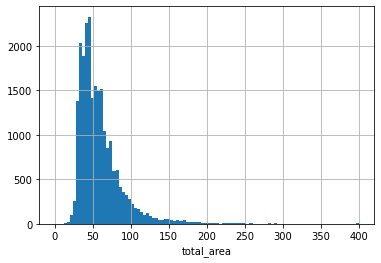

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [32]:
# гистограмма по площади
hhist(df, 'total_area', 100, 0, 400) 

In [33]:
# просмотр графы со значением площади в 900
display(df[df['total_area'].isin([900])])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,year,month,week_day,floor_cat,share_living_area,share_kitchen_area
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,2.0,318.0,106.0,466666,2017,12,2,последний,0.455222,0.124444


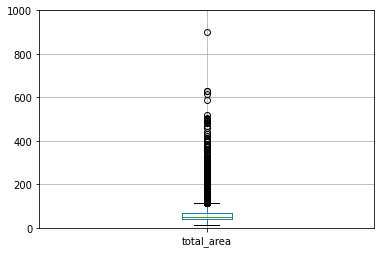

In [34]:
# диаграмма размаха по площади
bplot(df, 'total_area', 0, 1000)

Узкий пик около 45, мало значений после 150. Можно сделать вывод о том, что квартир с общей площадью от 25 до 100 больше, чем свыше 100, и большее их колличество приходится от 40 до 70. Вызывает сомнение значение в 900, но исходя из данных, 12 комнат, стоимость в 420 млн., тут все в порядке.

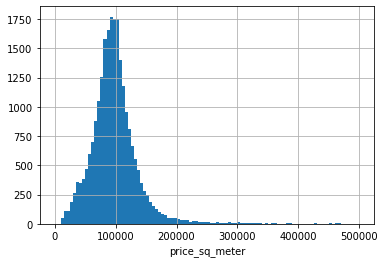

count    2.356500e+04
mean     9.940539e+04
std      5.038944e+04
min      1.110000e+02
25%      7.656600e+04
50%      9.500000e+04
75%      1.142130e+05
max      1.907500e+06
Name: price_sq_meter, dtype: float64

In [35]:
# гистограмма по цене за м.кв.
hhist(df, 'price_sq_meter', 100, 0, 500000)

In [36]:
# просмотр графы со значением стоимости за м.кв в 1907500
display(df[df['price_sq_meter'].isin([1907500, 111])])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,year,month,week_day,floor_cat,share_living_area,share_kitchen_area
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0.0,504.0,8.0,111,2019,3,2,последний,0.293578,0.37156
12971,19,763000000,400.0,2017-09-30,7,2.70,10,250.0,10,False,...,3.0,756.0,33.0,1907500,2017,9,5,последний,0.625000,0.02475


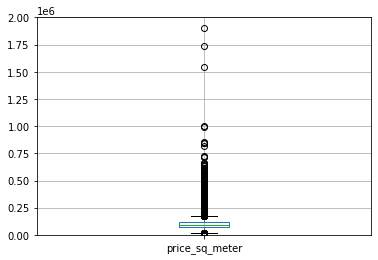

In [37]:
# диаграмма размаха по цене за м.кв.
bplot(df, 'price_sq_meter', 0, 2000000)

Пик приходится на 90 - 100 тысяч, совсем мало значений после 250 тысяч. На стоимость от 50 до 150 за м.кв приходится большая часть квартир. Есть квартира стоимостью в 1907500 за м.кв, здесь с данными тоже все в порядке. И квартира с 111 за м.кв, очень дешего, но целых две комнаты, этаж последний, может быть это чердак.

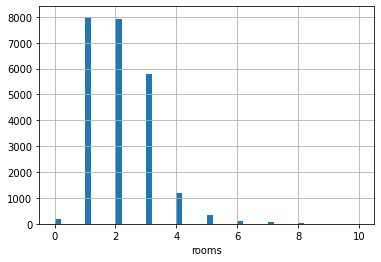

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [38]:
# гистограмма по числу комнат
hhist(df, 'rooms', 50, 0, 10)

In [39]:
# просмотр графы со значением комнат 19
display(df[df['rooms'].isin([19])])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,year,month,week_day,floor_cat,share_living_area,share_kitchen_area
14498,6,32250000,374.6,2018-06-09,19,2.7,5,264.5,2,False,...,2.0,548.0,114.0,86091,2018,6,5,другой,0.706086,0.073679


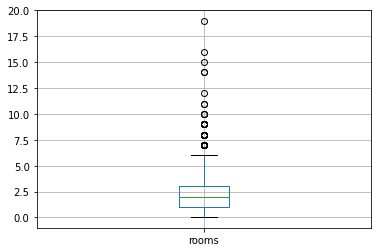

In [40]:
# диаграмма размаха по числу комнат
bplot(df, 'rooms', -1, 20)

В большинстве квартир от 1 до 3 комнат. Начиная с 4 комнат квартир все меньше. Присутствует достаточно много квартир с 0 комнат, возможно это студии. Так же есть одна квартира с 19 комнатами, исходя из данных все корректно.

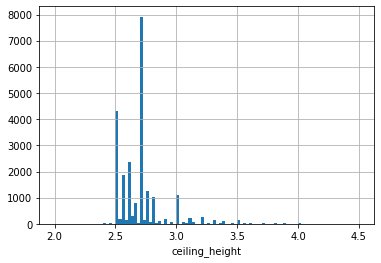

count    23565.000000
mean         2.733740
std          1.012203
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [41]:
# гистограмма по высоте потолков
hhist(df, 'ceiling_height', 100, 2, 4.5)

In [42]:
# просмотр графы со значением высоты потолков в 100
display(df[df['ceiling_height'].isin([100])])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,year,month,week_day,floor_cat,share_living_area,share_kitchen_area
22869,0,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,3.0,30.0,19.0,600000,2018,7,2,последний,0.56,0.44


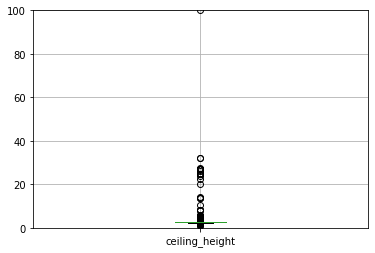

In [43]:
# диаграмма размаха по высоте потолков
bplot(df, 'ceiling_height', 0, 100)

Два узких пика около 2.5 и 2.7, небольшой пик на 3, после 3 значений совсем мало. Это говорит о том, что квартиры с высотой потолков от 2.5м до 3м встречаются чаще чем квартиры с потолками свыше 3м. Интересная квартира с полтолками в 100 м, похоже что-то здесь пошло не так.

В процессе изучения площади, цены, числа комнат, высоты потолков и построение гистограмм для каждого параметра, можно обратить внимание на слишком высокие или низкие значения, которые, в свою очередь, представляют собой выбросы, которые далее лучше не учитывать при анализе, для получения наиболее правдоподобных результатов.

### Изучение времени продажи квартиры

Построение гистограммы. Подсчет среднего и медианы. Описание, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

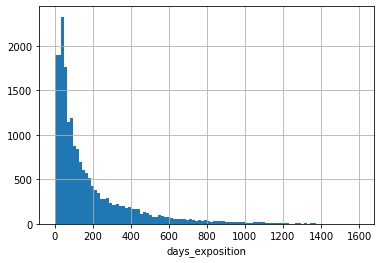

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [44]:
# гистограмма по времени продажи
hhist(df, 'days_exposition', 100, 0, 1600)

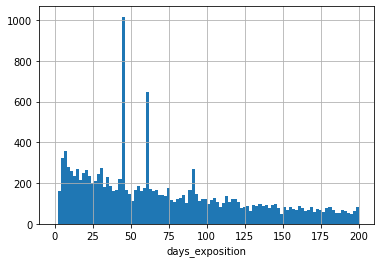

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [45]:
# гистограмма по времени продажи, с ограничением для детального рассмотрения пиков
hhist(df, 'days_exposition', 100, 0, 200)

Присутствуют отдельные пики примерно на 45, на 62 и на 93 днях.

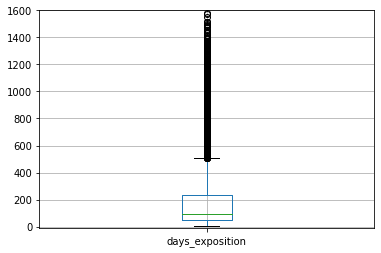

In [46]:
# диаграмма размаха по времени продажи
bplot(df, 'days_exposition', -10, 1600)

Среднее = 180.74, Медиана = 95.

Обычно продажа занимает около 95 дней, свыше 500 дней слишком долгие продажи, ниже 1 дня слишком быстрые, но последних не имеется.

### Избавление от редких и выбивающихся значений

In [47]:
# для удобства нахождение Q1, Q3 и IQR для каждого, исследуемого столбца
column_a = 'total_area'
q1_a = 40
q3_a = 69.7
iqr_a = q3_a - q1_a

column_p = 'price_sq_meter'
q1_p = 7.656600e+04
q3_p = 1.142130e+05
iqr_p = q3_p - q1_p

column_r = 'rooms'
q1_r = 1
q3_r = 3
iqr_r = q3_r - q1_r

column_c = 'ceiling_height'
q1_c = 2.55
q3_c = 2.7
iqr_c = q3_c - q1_c


# фильтрация для избавления от выбросов
filtered_df = df.query('(@q1_a - 1.5 * @iqr_a) <= total_area <= (@q3_a + 1.5 * @iqr_a) and (@q1_p - 1.5 * @iqr_p) <= price_sq_meter <= (@q3_p + 1.5 * @iqr_p) and (@q1_r - 1.5 * @iqr_r) <= rooms <= (@q3_r + 1.5 * @iqr_r) and (@q1_c - 1.5 * @iqr_c) <= ceiling_height <= (@q3_c + 1.5 * @iqr_c)')

# проверка
display(filtered_df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,year,month,week_day,floor_cat,share_living_area,share_kitchen_area
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.0,8,False,...,2.0,755.0,NaN,120370,2019,3,3,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.6,1,False,...,0.0,584.5,81.0,82920,2018,12,1,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.3,4,False,...,2.0,574.0,558.0,92785,2015,8,3,другой,0.612500,0.148214
5,10,2890000,30.4,2018-09-10,1,2.600,12,14.4,5,False,...,NaN,NaN,55.0,95065,2018,9,0,другой,0.473684,0.299342
6,6,3700000,37.3,2017-11-02,1,2.640,26,10.6,6,False,...,0.0,593.0,155.0,99195,2017,11,3,другой,0.284182,0.386059


In [48]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19739 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19739 non-null  int64         
 1   last_price            19739 non-null  int64         
 2   total_area            19739 non-null  float64       
 3   first_day_exposition  19739 non-null  datetime64[ns]
 4   rooms                 19739 non-null  int64         
 5   ceiling_height        19739 non-null  float64       
 6   floors_total          19739 non-null  int64         
 7   living_area           19739 non-null  float64       
 8   floor                 19739 non-null  int64         
 9   is_apartment          19739 non-null  bool          
 10  studio                19739 non-null  bool          
 11  open_plan             19739 non-null  bool          
 12  kitchen_area          19739 non-null  float64       
 13  balcony         

После фильтрации осталось 19739 строк, отфильтрованные строки составляют 16.7% от всех данных.

### Факторы больше всего влияющие на стоимость квартиры

In [49]:
# функция для построения графиков
def pplot(dataframe, column1, column2, median, style='-'):
    dataframe.groupby(column1).agg({column2:median}).plot(style=style)
    plt.show()
    return 

In [54]:
def ccorr(dframe, column1, column2):
    return print(dframe[column1].corr(dframe[column2]))

In [55]:
def scpplot(dframe, x, y):
    dframe.plot(x=x, y=y, kind='scatter')
    plt.show()
    return 

Зависимость цены от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.

In [57]:
# расчет коэффициента корреляции для цены от квадратного метра
ccorr(filtered_df, 'price_sq_meter', 'total_area')

0.0022853312492596574


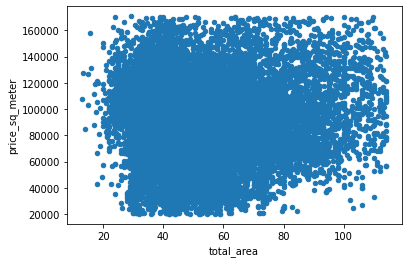

In [58]:
# график зависимости цены за м.кв от общей площади
scpplot(filtered_df, 'total_area', 'price_sq_meter')

Линейная связь отсутсвует. Исходя из диаграммы рассеяния видно что квартиры по большей части распределены в диапазоне цены за квадратный метр от 30000 до 130000 при общей площади от 30 до 70, соответственно. Квартир общей площадью в 100 и выше меньше, как и квартир со стоимостью квадратного метра свыше 140000. Присутствуют отдельные, сомнительные, значения при общей площади в 100 и выше стоимость квадратного метра примерно в 30000.

In [59]:
# расчет коэффициентм корреляции для цены от числа комнат
ccorr(filtered_df, 'price_sq_meter', 'rooms')

-0.1916332580355458


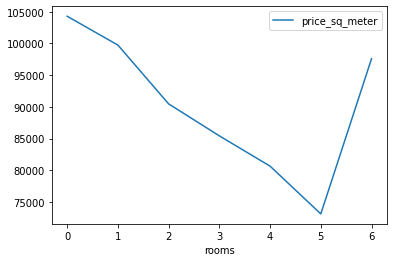

In [60]:
# график зависимости цены за м.кв от числа комнат
pplot(filtered_df, 'rooms', 'price_sq_meter', 'median')

Линейная связь отсутсвует. В случае квартир с 5-ю комнатами стоимость за квадратный метр самая минимальная. Наибольшая стоимость квадратного метра приходится на квартиры с наименьшим количеством комнат.

In [61]:
# фильтрация для получения строк с первым и последним этажами
floor_df = filtered_df.query('floor_cat == ["первый", "последний"]')

# расчет коэффициента корреляции для цены от этажа
ccorr(floor_df, 'price_sq_meter', 'floor')

0.26378033899615266


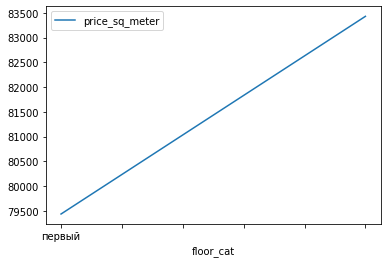

In [62]:
# график зависимости цены за м.кв от этажа (первый, последний)
pplot(floor_df, 'floor_cat', 'price_sq_meter', 'median')

Линейная связь отсутсвует. Наименьшая стоимость за квадратный метр приходится на квартиры первого этажа и повышается к последнему.

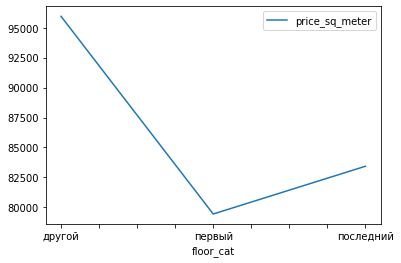

In [63]:
# график зависимости цены за м.кв от этажа
pplot(filtered_df, 'floor_cat', 'price_sq_meter', 'median')

Первые этажи самые низкие по стоимости за квадратый метр, как и по расположению. Стоимость растет если этаж не последний и не первый, и растет значительно, больше чем растет стоимость посднего по сравнению с первым.

In [65]:
# расчет коэффициента корреляции для цены от высоты потолков
ccorr(filtered_df, 'price_sq_meter', 'ceiling_height')

0.3603313196653484


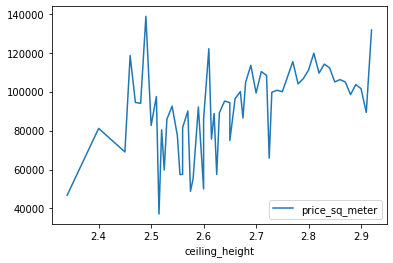

In [66]:
# график зависимости цены за м.кв от высоты потолков
pplot(filtered_df, 'ceiling_height', 'price_sq_meter', 'median')

Небольшая линейная связь присутствует. Наименьшая стоимость за квадратный метр приходится на квартиры с высотой потолков ниже 2.4, отдельный скачек наблюдается на 2.52. Наибольшая стоимость приходится на промежутки от 2.45 до 2.5 и от 2.6 до 2.85. После 2.85 наблюдается незначительный спад.

In [67]:
# расчет коэффициента корреляции для цены от удаленности от центра
ccorr(filtered_df, 'price_sq_meter', 'city_centers_nearest')

-0.40417770357131755


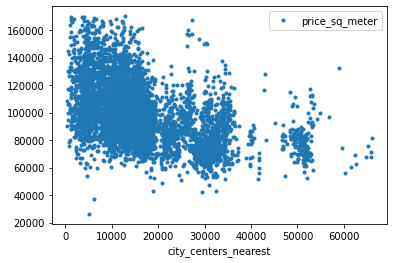

In [68]:
# график зависимости цены за м.кв от удаленности от центра
pplot(filtered_df, 'city_centers_nearest', 'price_sq_meter', 'median', '.')

Небольшая линейная связь присутствует. В общей сложности стоимость квадратного метра уменьшается с возрастанием расстояния от центра. Имеются отдельные пики низкой стоимости на расстоянии от центра в 55000, 60000, 180000 и 29000 м, а также пики высокой стоимости за квадратный метр в 26000, 30000, 42000 и 57000 м удаленности от центра.

Зависимость от даты размещения: дня недели, месяца и года

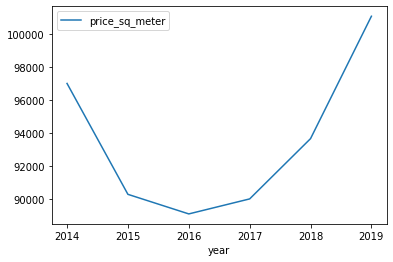

In [69]:
# график зависимости цены за м.кв от года
pplot(filtered_df, 'year', 'price_sq_meter', 'median')

Исходя из графика можно обратить внимание, что стоимость квадратного метра снизилась с 2014 года по 2016 и стала постепенно возрастать с 2016 года по 2017 год, этот рост не был таким значительным, но после 2017 года стоимость квадратного метра стала возрастать сильнее и уже после 2018 достаточно сильно устримилась вверх.

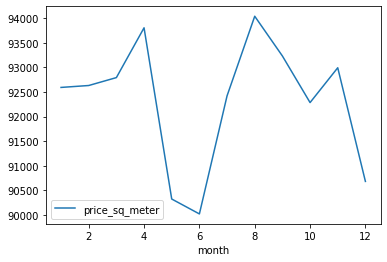

In [70]:
# график зависимости цены за м.кв от месяца
pplot(filtered_df, 'month', 'price_sq_meter', 'median')

Стоимость квадратного метра с начала года по Апрель растет, на Аперль приходится пик высокой стоимости, далее значительно снижается к Июню (пик низкой стоимости) и сильно возрастает к концу лета (Август), также заметно снижение к Новому году, но сразу после, стоимость достаточно высока.

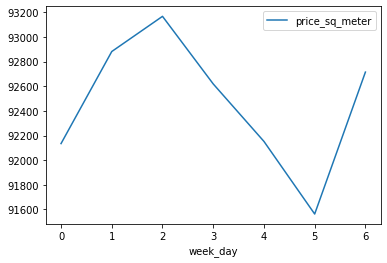

In [71]:
# график зависимости цены за м.кв от дня недели
pplot(filtered_df, 'week_day', 'price_sq_meter', 'median')

Заметный рост приходится к середине недели (среда), спад стоимости за квадратный метр приходится на субботу, после чего начинает возрастать.

- Линейная связь отсутствует в случаях зависимости цены от квадратного метра, числа комнат, этажа.
- Небольная линейная связь присутствует в случаях зависимости цены от высоты потолков, удаленности от центра.
- Зависимость от даты размещения: дня недели, месяца и года:
    - стоимость квадратного метра снизилась с 2014 года по 2016 и стала постепенно возрастать с 2016 года по 2017 год, этот рост не был таким значительным, но после 2017 года стоимость квадратного метра стала возрастать сильнее и уже после 2018 достаточно сильно устримилась вверх;
    - стоимость квадратного метра с начала года по Апрель растет, на Аперль приходится пик высокой стоимости, далее значительно снижается к Июню (пик низкой стоимости) и сильно возрастает к концу лета (Август), также заметно снижение к Новому году, но сразу после, стоимость достаточно высока;
    - заметный рост стоимости квадратного метра приходится к середине недели (среда), спад стоимости за квадратный метр приходится на субботу, после чего начинает возрастать.

### 10 населённых пунктов с наибольшим числом объявлений

Посчет средней цены квадратного метра в этих населённых пунктах.

In [76]:
# формирование сводной таблицы
df_pivot_local = filtered_df.pivot_table(index='locality_name', values='price_sq_meter', aggfunc=['sum', 'count','mean'])

# названия колонок
df_pivot_local.columns = ['price_sq_meter', 'total', 'mean']

# сортировка
df_pivot_local = df_pivot_local.sort_values(by = ['total'], ascending = False)
display(df_pivot_local.head(10))

,price_sq_meter,total,mean
locality_name,,,
Санкт-Петербург,1303122899,12410,105005.874214
посёлок Мурино,43942230,513,85657.368421
посёлок Шушары,34089116,434,78546.350230
Всеволожск,25588717,382,66986.170157
посёлок Парголово,29448180,326,90331.840491
Колпино,24001276,318,75475.710692
Пушкин,31795309,314,101258.945860
деревня Кудрово,27461402,297,92462.632997
Гатчина,19535621,283,69030.462898


В 10 населенных пунктов с наибольшим числом объявлений входят: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, посёлок Парголово, Колпино, деревня Кудрово, Пушкин, Гатчина, Выборг.

Населённые пункты с самой высокой и низкой стоимостью жилья.

In [98]:
# таблица из 10 населенных пунктов
best10 = df_pivot_local.head(10)
best10['mean'] = best10['mean'].round(2)

# проверка
display(best10)

,price_sq_meter,total,mean
locality_name,,,
Санкт-Петербург,1303122899,12410,105005.87
посёлок Мурино,43942230,513,85657.37
посёлок Шушары,34089116,434,78546.35
Всеволожск,25588717,382,66986.17
посёлок Парголово,29448180,326,90331.84
Колпино,24001276,318,75475.71
Пушкин,31795309,314,101258.95
деревня Кудрово,27461402,297,92462.63
Гатчина,19535621,283,69030.46


In [99]:
# сортировка по средней стоимости квадратного метра
display(best10.sort_values(by = ['mean'], ascending = False))

,price_sq_meter,total,mean
locality_name,,,
Санкт-Петербург,1303122899,12410,105005.87
Пушкин,31795309,314,101258.95
деревня Кудрово,27461402,297,92462.63
посёлок Парголово,29448180,326,90331.84
посёлок Мурино,43942230,513,85657.37
посёлок Шушары,34089116,434,78546.35
Колпино,24001276,318,75475.71
Гатчина,19535621,283,69030.46
Всеволожск,25588717,382,66986.17


В Санкт-Петербурге стоимость квадратного метра самая дорогая (105005.87), а в Выборге стоимость квадратного метра самая низкая (57870.86).

### Изучение предложений квартир

Выделение квартир в Санкт-Петербурге:

In [100]:
# для получения значений в километрах
filtered_df['mean_price_km'] = (filtered_df['city_centers_nearest'] / 1000).round()

# фильтрация для выделения квартир в Санкт-Петербурге и средней стоимости для каждого км
spb_df = (filtered_df.query('locality_name == "Санкт-Петербург"').groupby('mean_price_km')
          .agg({'price_sq_meter': 'mean'}).round(2)
         )

# проверка
display(spb_df.head())

,price_sq_meter
mean_price_km,
0.0,114373.33
1.0,116962.18
2.0,113759.16
3.0,110491.20
4.0,116700.18


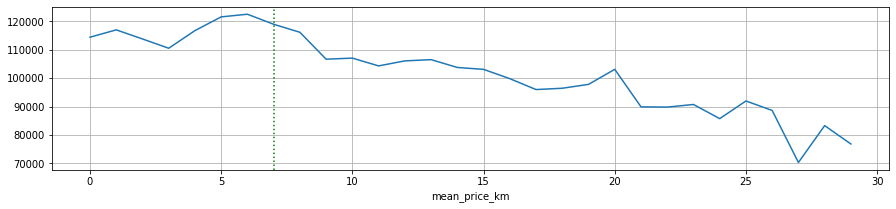

In [101]:
# график зависимости средней стоимости кв. метра от удаленности от центра
spb_df['price_sq_meter'].plot(grid = True, figsize = (15, 3))

# граница
plt.axvline(x=7, color='green', linestyle=':')
plt.show()

Исходя из графика можно делать вывод о том, что в центральную зону входят все квартиры, находящиеся на расстоянии не более 7 км от центра.

### Выделение сегмента квартир в центре

Изучение следующих параметров: площадь, цена, число комнат, высота потолков.

In [79]:
# фильтрация для получения нужной удаленности от центра и нужного города
centre_df = filtered_df.query('(city_centers_nearest <= 7500) and (locality_name == "Санкт-Петербург")')

# для получения значений в километрах
centre_df['city_centers_nearest'] = centre_df['city_centers_nearest'] / 1000

# округление до целого значения
centre_df['city_centers_nearest'] = centre_df['city_centers_nearest'].astype(int) 

# создание таблицы с необходимыми столбцами для удобства
centre_df_hist = centre_df[['total_area', 'price_sq_meter', 'rooms', 'ceiling_height', 'city_centers_nearest', 'locality_name']]

# проверка
display(centre_df_hist.head())

,total_area,price_sq_meter,rooms,ceiling_height,city_centers_nearest,locality_name
24,97.2,66872,2,2.7,2,Санкт-Петербург
61,74.0,107972,2,2.7,4,Санкт-Петербург
94,29.5,118644,1,2.5,7,Санкт-Петербург
99,90.0,106666,4,2.7,2,Санкт-Петербург
111,40.0,114750,1,2.7,6,Санкт-Петербург


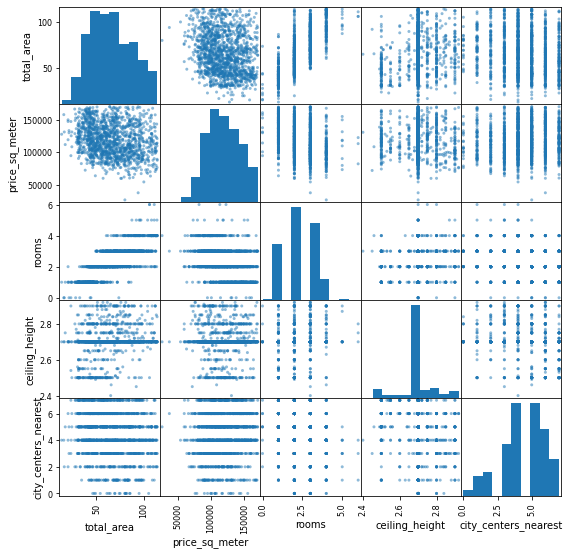

In [85]:
# матрица рассеяния
pd.plotting.scatter_matrix(centre_df_hist, figsize=(9, 9))
plt.show()

In [84]:
# корреляция исследуемых параметров
display(centre_df_hist.corr())

,total_area,price_sq_meter,rooms,ceiling_height,city_centers_nearest
total_area,1.000000,-0.218129,0.780073,0.169378,-0.155728
price_sq_meter,-0.218129,1.000000,-0.368399,-0.027005,0.107582
rooms,0.780073,-0.368399,1.000000,0.109457,-0.186127
ceiling_height,0.169378,-0.027005,0.109457,1.000000,-0.154840
city_centers_nearest,-0.155728,0.107582,-0.186127,-0.154840,1.000000


* Во второй вниз от левого угла верхнего угла: связь стоимости квадратного метра и общей площади. Линейной зависимости как не было, так и нет. Стоимость квадратного метра зависимо от общей площади распределяется следующим образом: большинство квартир приходится на стоимость от 70000 до 150000 за кв. метр при общей площади от 25 до 100. Присутствуют отдельные квартиры стоимостью менее 50000 за кв. метр с общей площадью, при этом, выше 70.
* Из диаграммы разброса в третьей левой ячейке сверху можно сделать вывод, что чем больше общая площадь, тем и комнат больше, тут и наблюдается зависимость (корреляция 0.78).
* В ячейке ниже: связь между высотой потолков и общей площадью, заметно, что в большинстве потолки 2.7 м.
* В нижней левой ячейке связь между удаленности от центра и общей площади, можно сказать, что в основном квартиры находятся немного дальше самого центра
* По зависимости между стоимостью квадратного метра и количеством комнат, можно сделать вывод, что квартиры с одной комнатой и до четырех пользуются большим спросом, но по стоимости не слишком отличаются.
* Исходя из зависимости стоимости квадратного метра и высоты потолков, также можно сказать только то, что квартир с высотой потолков 2.7 больше.
* Так же стоимость квадратного метра не слишком отличается в зависимости от удаленности от центра, квартир на расстоянии от 4 до 6 км от цетра немного больше со более высокой стоимостью за квадратный метр.

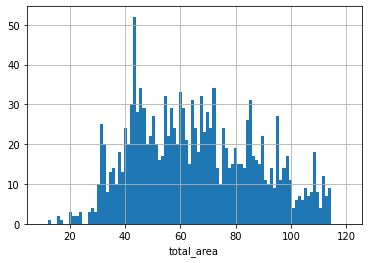

count    1448.000000
mean       65.698543
std        22.077478
min        13.200000
25%        47.000000
50%        64.000000
75%        83.100000
max       114.200000
Name: total_area, dtype: float64

In [86]:
# гистограмма по общей площади
hhist(centre_df, 'total_area', 100, 10, 120)

Пик около 43. Можно сделать вывод о том, что квартир с общей площадью от 30 до 100 преобладают, совсем мало квартир с общей площадью менее 30.

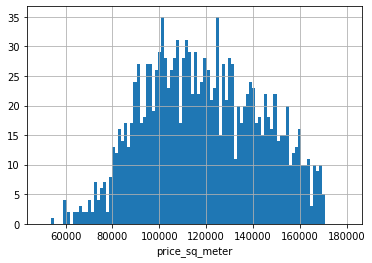

count      1448.000000
mean     118807.078039
std       24781.000388
min       26250.000000
25%      100000.000000
50%      117449.500000
75%      138284.000000
max      170312.000000
Name: price_sq_meter, dtype: float64

In [87]:
# гистограмма по цене за м.кв.
hhist(centre_df, 'price_sq_meter', 100, 50000, 180000)

Присутствуют два пика, чуть больше 100000 и около 125000 за кв.м. Заметно, что стоимость кв.м распределена по большей части от 80000 до 160000,свыше 160000 квартир меньше, а на стоимость ниже 80000 за м.кв, приходится еще меньше квартир.

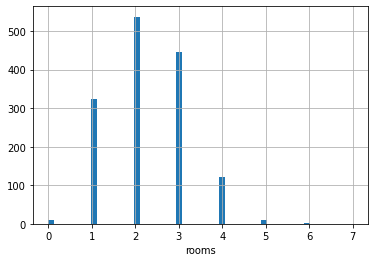

count    1448.000000
mean        2.267265
std         0.954228
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

In [88]:
# гистограмма по количеству комнат
hhist(centre_df, 'rooms', 50, 0, 7)

В основном в центре СПб квартиры с 1 до 4 комнат, включительно. Совсем немнного квартир без комнат ил 5-6 комнатами.

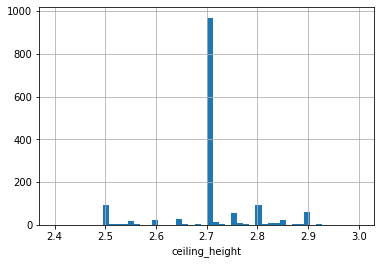

count    1448.000000
mean        2.704192
std         0.082229
min         2.400000
25%         2.700000
50%         2.700000
75%         2.700000
max         2.920000
Name: ceiling_height, dtype: float64

In [89]:
# гистограмма высоты потолков
hhist(centre_df, 'ceiling_height', 50, 2.4, 3)

Высота потолков распределена между 2.5 и 2.9, преобладают квартиры с высотой потолков в 2.7, что характерно для квартир в центре СПб.

Выделение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [90]:
# создание таблицы с необходимыми столбцами для удобства
centre_df_best = centre_df[['price_sq_meter', 'rooms', 'city_centers_nearest', 'floor_cat', 'year', 'month', 'week_day', 
                            'locality_name']]

# проверка
display(centre_df_best.head())

,price_sq_meter,rooms,city_centers_nearest,floor_cat,year,month,week_day,locality_name
24,66872,2,2,первый,2015,10,5,Санкт-Петербург
61,107972,2,4,последний,2017,8,3,Санкт-Петербург
94,118644,1,7,другой,2019,4,4,Санкт-Петербург
99,106666,4,2,другой,2017,9,1,Санкт-Петербург
111,114750,1,6,первый,2017,5,0,Санкт-Петербург


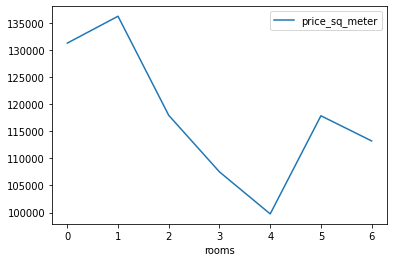

In [91]:
# график зависимости цены за м.кв от количества комнат
pplot(centre_df_best, 'rooms', 'price_sq_meter', 'median')

В случае квартир с 4-я комнатами стоимость за квадратный метр самая минимальная. Наибольшая стоимость квадратного метра приходится на квартиры с 1-й комнатой.

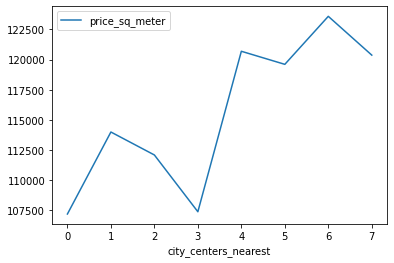

In [92]:
# график зависимости цены за м.кв от удаленности от центра
pplot(centre_df_best, 'city_centers_nearest', 'price_sq_meter', 'median')

Самые дорогостоящие квартиры по стоимости квадратного метра находятся на расстоянии 4 и более км. Самая низкая стоимость за квадратный метр на расстоянии в 3 км от центра.

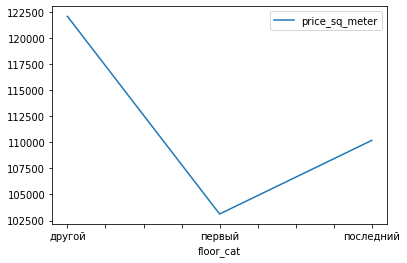

In [93]:
# график зависимости цены за м.кв от этажа
pplot(centre_df_best, 'floor_cat', 'price_sq_meter', 'median')

Первые этажи самые низкие по стоимости за квадратый метр, как и по расположению. Стоимость растет если этаж не последний и не первый, и растет значительно, больше чем растет стоимость посднего по сравнению с первым.

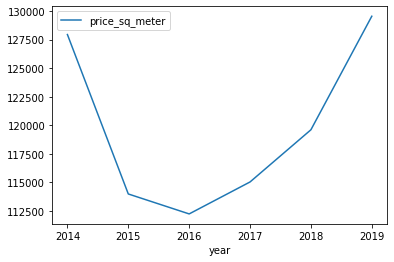

In [94]:
# график зависимости цены за м.кв от года объявления
pplot(centre_df_best, 'year', 'price_sq_meter', 'median')

Исходя из графика можно обратить внимание, что стоимость квадратного метра снизилась с 2014 года по 2016 и стала постепенно возрастать с 2016 года по 2017 год, этот рост не был таким значительным, но после 2017 года стоимость квадратного метра стала возрастать сильнее и уже после 2018 достаточно сильно устримилась вверх.

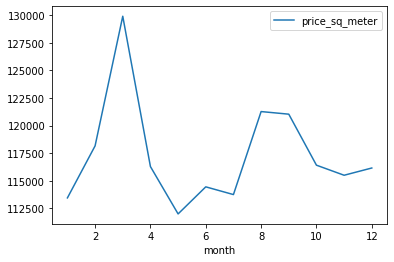

In [95]:
# график зависимости цены за м.кв от месяца объявления
pplot(centre_df_best, 'month', 'price_sq_meter', 'median')

На начало Марта приходится пик максимальной стоимости квадратного метра. С Марта по Июнь стоимость значительно снижается и возрастает к концу лета (Август), также заметно снижение к Октябрю, но сразу после, стоимость растет.

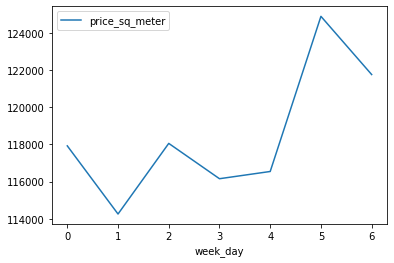

In [96]:
# график зависимости цены за м.кв от дня объявления
pplot(centre_df_best, 'week_day', 'price_sq_meter', 'median')

Во вторник стоимость квадратного метра дает наименьший показатель, рост продолжается в течении недели и достигает максимума к субботе.

Сравнение с общей базой:
* `total_area` - Пик около 43 приходится и в том и в другом случае. Квартиры с общей площадью от 30 до 100 преобладают.
* `price_sq_meter` - Cтоимость кв.м в случае квартир в центре СПб распределена по большей части от 80000 до 160000, тогда как в общей базе стоимость распределена от 50000 до 150000 за м.кв. В центре СПб квартир со стоимостью кв.м свыше 160000 меньше, тогда как в общей базе совсем мало значений после 250000.
* `rooms` - В основном в центре СПб квартиры с 1 до 4 комнат, включительно. Совсем немнного квартир без комнат или 5-6 комнатами, тогда как в общей базе достаточно много квартир с 0 комнат, а в большинстве квартир от 1 до 3 комнат. Начиная с 4 комнат в общей базе квартир все меньше.
* `ceiling_height` - Высота потолков распределена между 2.5 и 2.9 в случае центра СПб, тогда как в общей базе от 2.5 до 4 м преобладают квартиры с высотой потолков в 2.7 и в случае центра СПб и общей базы. В общей базе квартиры с высотой потолков от 2.5м до 3м встречаются чаще чем квартиры с потолками свыше 3м, это утверждение подходит и для квартир центра СПб.

* `total_area` -  Исходя из диаграммы рассеяния в общей базе, видно что квартиры по большей чести распределены в диапазоне цены за квадратный метр от 30000 до 130000 при общей площади от 30 до 70, соответственно, тогда как для центра СПб большинство квартир приходится на стоимость от 70000 до 150000 за кв. метр при общей площади от 25 до 100, соответственно.
* `rooms` - В общей базе минимальная стоимость квадратного метра приходится на квартиры с 5ю комнатами, тогда как для центра СПб минимальная стоимость квадратного метра приходится на квартиры с 4мя комнатами.
* `floor_cat` - Первые этажи самые низкие по стоимости за квадратый метр, как и по расположению. Стоимость растет если этаж не последний и не первый, и растет значительно, больше чем растет стоимость посднего по сравнению с первым. Это утверждение одинакого для общей базы и для квартир в центре СПБ.
* `city_centers_nearest` - В случае общей базы стоимость квадратного метра уменьшается с возрастанием расстояния от центра, а вот в случае центра СПб, чем дальше от центра тем дороже жилье, самая минимальная стоимость приходится на 3 км от центра.
* `year` - Cтоимость квадратного метра снизилась с 2014 года по 2016 и стала постепенно возрастать с 2016 года по 2017 год, этот рост не был таким значительным, но после 2017 года стоимость квадратного метра стала возрастать сильнее и уже после 2018 достаточно сильно устримилась вверх.Это утверждение одинакого для общей базы и для квартир в центре СПБ.
* `month` - Стоимость растет в случае общей базы до Апреля (максимум), в случае центра СПб до Марта (максимум), дале по Июнь стоимость значительно снижается и возрастает к концу лета (Август) для общей базы и центра СПб.
* `week_day` - Заметный рост приходится к середине недели (среда), спад стоимости за квадратный метр приходится на субботу, после чего начинает возрастать в случае общей базы. Для центра СПб все немного иначе: Во вторник стоимость квадратного метра дает наименьший показатель, рост продолжается в течении недели и достигает максимума к субботе.

## Шаг 5. Общий вывод

*Предобработка данных*

Было обнаружено множество пропущеных значений, которые были заполнены с группировкой по локации, оставшиеся пропуски после замены по локации, например для `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest` были оставлены, так как для них нет корректой замены, и для `days_exposition`, так как объявление вероятнее всего еще находится в активном статусе, для `floors_total` и `locality_name`, пропуски были удалены, так как доля их от общего числа значений менее 5%, для `living_area` и `kitchen_area` была произведена замена с группировкой количеству комнат. 

Заголовки и перевод в другой тип данных значений некоторых стобцов, например в `last_price`, `floors_total` и `balcony` были исправлены на целочисленные, чтобы упростить работу с таблицей.

*Расчеты и добавление результатов в таблицу*

Были рассчитаны и добавлены:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры (варианты — первый, последний, другой);
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

*Исследовательский анализ*

В процессе изучения площади, цены, числа комнат, высоты потолков и построение гистограмм для каждого параметра, можно обратить внимание на слишком высокие или низкие значения, которые, в свою очередь, представляют собой выбросы, которые далее лучше не учитывать при анализе, для получения наиболее правдоподобных результатов.

Обычно продажа занимает около 95 дней, свыше 500 дней слишком долгие продажи, ниже 1 дня слишком быстрые, но последних не имеется.

После избавления от редких и выбивающихся значений осталось 19739 строк, отфильтрованные строки составляют 16.7% от всех данных.

Линейная связь отсутствует в случаях зависимости цены от квадратного метра, числа комнат, этажа. Небольная линейная связь присутствует в случаях зависимости цены от высоты потолков, удаленности от центра.

Зависимость от даты размещения: дня недели, месяца и года:
- стоимость квадратного метра снизилась с 2014 года по 2016 и стала постепенно возрастать с 2016 года по 2017 год, этот рост не был таким значительным, но после 2017 года стоимость квадратного метра стала возрастать сильнее и уже после 2018 достаточно сильно устримилась вверх;
- стоимость квадратного метра с начала года по Апрель растет, на Аперль приходится пик высокой стоимости, далее значительно снижается к Июню (пик низкой стоимости) и сильно возрастает к концу лета (Август), также заметно снижение к Новому году, но сразу после, стоимость достаточно высока;
- заметный рост стоимости квадратного метра приходится к середине недели (среда), спад стоимости за квадратный метр приходится на субботу, после чего начинает возрастать.
    
В 10 населенных пунктов с наибольшим числом объявлений входят: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, посёлок Парголово, Колпино, деревня Кудрово, Пушкин, Гатчина, Выборг. В Санкт-Петербурге стоимость квадратного метра самая дорогая (105005.87), а в Выборге стоимость квадратного метра самая низкая (57870.86).

В центральную зону Санкт-Петербурга входят все квартиры, находящиеся на расстоянии не более 7 км от центра.

Изучение сегмента квартир в центре в сравнение с общей базой:

* `total_area` - Пик около 43 приходится и в том и в другом случае. Квартиры с общей площадью от 30 до 100 преобладают.
* `price_sq_meter` - Cтоимость кв.м в случае квартир в центре СПб распределена по большей части от 80000 до 160000, тогда как в общей базе стоимость распределена от 50000 до 150000 за м.кв. В центре СПб квартир со стоимостью кв.м свыше 160000 меньше, тогда как в общей базе совсем мало значений после 250000.
* `rooms` - В основном в центре СПб квартиры с 1 до 4 комнат, включительно. Совсем немнного квартир без комнат или 5-6 комнатами, тогда как в общей базе достаточно много квартир с 0 комнат, а в большинстве квартир от 1 до 3 комнат. Начиная с 4 комнат в общей базе квартир все меньше.
* `ceiling_height` - Высота потолков распределена между 2.5 и 2.9 в случае центра СПб, тогда как в общей базе от 2.5 до 4 м преобладают квартиры с высотой потолков в 2.7 и в случае центра СПб и общей базы. В общей базе квартиры с высотой потолков от 2.5м до 3м встречаются чаще чем квартиры с потолками свыше 3м, это утверждение подходит и для квартир центра СПб.

* `total_area` -  Исходя из диаграммы рассеяния в общей базе, видно что квартиры по большей чести распределены в диапазоне цены за квадратный метр от 30000 до 130000 при общей площади от 30 до 70, соответственно, тогда как для центра СПб большинство квартир приходится на стоимость от 70000 до 150000 за кв. метр при общей площади от 25 до 100, соответственно.
* `rooms` - В общей базе минимальная стоимость квадратного метра приходится на квартиры с 5ю комнатами, тогда как для центра СПб минимальная стоимость квадратного метра приходится на квартиры с 4мя комнатами.
* `floor_cat` - Первые этажи самые низкие по стоимости за квадратый метр, как и по расположению. Стоимость растет если этаж не последний и не первый, и растет значительно, больше чем растет стоимость посднего по сравнению с первым. Это утверждение одинакого для общей базы и для квартир в центре СПБ.
* `city_centers_nearest` - В случае общей базы стоимость квадратного метра уменьшается с возрастанием расстояния от центра, а вот в случае центра СПб, чем дальше от центра тем дороже жилье, самая минимальная стоимость приходится на 3 км от центра.
* `year` - Cтоимость квадратного метра снизилась с 2014 года по 2016 и стала постепенно возрастать с 2016 года по 2017 год, этот рост не был таким значительным, но после 2017 года стоимость квадратного метра стала возрастать сильнее и уже после 2018 достаточно сильно устримилась вверх.Это утверждение одинакого для общей базы и для квартир в центре СПБ.
* `month` - Стоимость растет в случае общей базы до Апреля (максимум), в случае центра СПб до Марта (максимум), дале по Июнь стоимость значительно снижается и возрастает к концу лета (Август) для общей базы и центра СПб.
* `week_day` - Заметный рост приходится к середине недели (среда), спад стоимости за квадратный метр приходится на субботу, после чего начинает возрастать в случае общей базы. Для центра СПб все немного иначе: Во вторник стоимость квадратного метра дает наименьший показатель, рост продолжается в течении недели и достигает максимума к субботе.
    
С учетом всех факторов, оказывающих влияние на стоимоть квартиры, можно сделать вывод о том, что возможны некоторые аномалии в случае зависимости стоимости от удаленности от центра, странно, что квартиры удаленностью в 3 км от центра самые недорогие, дешевле тех, что ближе и тех что дальше от центра. В ходе исследования была заметна разница распределения стоимости квадратного метра от различных показателей (месяца, дня недели, комнат, общей площади, удаленности от центра) между общей базой и центром Санкт-Петербурга. Также в случае зависимости стоимости от даты размещения объявления, скачки низкой стоимости в 2017-2019 гг. могут говорить о том, что присутсвует мошенническая деятельнось.